# overview
See input data and output format 

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.jpg'):
            break
        print(os.path.join(dirname, filename))

/kaggle/input/efficientnet/.travis.yml
/kaggle/input/efficientnet/LICENSE
/kaggle/input/efficientnet/.gitignore
/kaggle/input/efficientnet/README.md
/kaggle/input/efficientnet/MANIFEST.in
/kaggle/input/efficientnet/requirements.txt
/kaggle/input/efficientnet/__init__.py
/kaggle/input/efficientnet/setup.py
/kaggle/input/efficientnet/tests/test_model.py
/kaggle/input/efficientnet/scripts/load_efficientnet.py
/kaggle/input/efficientnet/scripts/convert_from_tf_to_keras.sh
/kaggle/input/efficientnet/examples/inference_example.ipynb
/kaggle/input/efficientnet/misc/labels_map.txt
/kaggle/input/efficientnet/docker/Dockerfile
/kaggle/input/efficientnet/efficientnet/preprocessing.py
/kaggle/input/efficientnet/efficientnet/weights.py
/kaggle/input/efficientnet/efficientnet/model.py
/kaggle/input/efficientnet/efficientnet/tfkeras.py
/kaggle/input/efficientnet/efficientnet/__init__.py
/kaggle/input/efficientnet/efficientnet/keras.py
/kaggle/input/efficientnet/efficientnet/__version__.py
/kaggle/inp

Since there's a lot of images included there, we only checked non-image files and got the three above. Next, we will load the sample submission and check.

In [2]:
df_sample = pd.read_csv('../input/herbarium-2020-fgvc7/sample_submission.csv')
display(df_sample)

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
138287,138287,0
138288,138288,0
138289,138289,0
138290,138290,0


Load json files

In [3]:
import json
with open("../input/herbarium-2020-fgvc7/nybg2020/train/metadata.json", 'r',
                 encoding='utf-8', errors='ignore') as f:
    train_meta = json.load(f)
    
with open("../input/herbarium-2020-fgvc7/nybg2020/test/metadata.json", 'r',
                 encoding='utf-8', errors='ignore') as f:
    test_meta = json.load(f)

In [4]:
display(train_meta.keys())

dict_keys(['annotations', 'categories', 'images', 'info', 'licenses', 'regions'])

Now, we will be unifying the metadata from the `*.json` files. We will first work with the `train` data.

First, we access the `annotations` list and convert it to a df.

In [5]:
train_id = pd.DataFrame(train_meta['annotations'])
display(train_id)

,category_id,id,image_id,region_id
0,15672,354106,354106,1
1,11524,818566,818566,1
2,11524,750704,750704,1
3,11467,722381,722381,1
4,15660,382783,382783,1
...,...,...,...,...
1030742,24148,856534,856534,3
1030743,5142,541440,541440,1
1030744,27240,927988,927988,1
1030745,269,242745,242745,2


Next is for `plant categories`:

In [6]:
train_cat = pd.DataFrame(train_meta['categories'])
train_cat.columns = ['family', 'genus', 'category_id', 'category_name']
display(train_cat)

,family,genus,category_id,category_name
0,Orchidaceae,Aa,0,Aa mathewsii (Rchb.f.) Schltr.
1,Orchidaceae,Aa,1,Aa paleacea (Kunth) Rchb.f.
2,Fabaceae,Abarema,2,Abarema abbottii (Rose & Leonard) Barneby & J....
3,Fabaceae,Abarema,3,Abarema acreana (J.F.Macbr.) L.Rico
4,Fabaceae,Abarema,4,Abarema adenophora (Ducke) Barneby & J.W.Grimes
...,...,...,...,...
32089,Orchidaceae,Zygopetalum,32089,Zygopetalum maxillare Lodd.
32090,Orchidaceae,Zygopetalum,32090,Zygopetalum sellowii Rchb.f.
32091,Polypodiaceae,Zygophlebia,32091,Zygophlebia mathewsii (Kunze ex Mett.) L.E.Bishop
32092,Polypodiaceae,Zygophlebia,32092,Zygophlebia sectifrons (Kunze ex Mett.) L.E.Bi...


Followed by the `image properties`:

In [7]:
train_img = pd.DataFrame(train_meta['images'])
train_img.columns = ['file_name', 'height', 'image_id', 'license', 'width']
display(train_img)

,file_name,height,image_id,license,width
0,images/156/72/354106.jpg,1000,354106,1,661
1,images/115/24/818566.jpg,1000,818566,1,661
2,images/115/24/750704.jpg,1000,750704,1,661
3,images/114/67/722381.jpg,1000,722381,1,661
4,images/156/60/382783.jpg,1000,382783,1,661
...,...,...,...,...,...
1030742,images/241/48/856534.jpg,1000,856534,1,682
1030743,images/051/42/541440.jpg,1000,541440,1,661
1030744,images/272/40/927988.jpg,1000,927988,1,669
1030745,images/002/69/242745.jpg,1000,242745,1,682


And lastly, the `region`:

In [8]:
train_reg = pd.DataFrame(train_meta['regions'])
train_reg.columns = ['region_id', 'region_name']
display(train_reg)

,region_id,region_name
0,0,Mexico & Central America
1,1,South America
2,2,US & Canada
3,3,West Indies


Then, we will merge all the DataFrames and see what we got:

In [9]:
train_df = train_id.merge(train_cat, on='category_id', how='outer')
train_df = train_df.merge(train_img, on='image_id', how='outer')
train_df = train_df.merge(train_reg, on='region_id', how='outer')

In [10]:
print(train_df.info())
display(train_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030748 entries, 0 to 1030747
Data columns (total 12 columns):
category_id      1030748 non-null int64
id               1030747 non-null float64
image_id         1030747 non-null float64
region_id        1030747 non-null float64
family           1030748 non-null object
genus            1030748 non-null object
category_name    1030748 non-null object
file_name        1030747 non-null object
height           1030747 non-null float64
license          1030747 non-null float64
width            1030747 non-null float64
region_name      1030747 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 102.2+ MB
None


,category_id,id,image_id,region_id,family,genus,category_name,file_name,height,license,width,region_name
0,15672,354106.0,354106.0,1.0,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/354106.jpg,1000.0,1.0,661.0,South America
1,15672,545181.0,545181.0,1.0,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/545181.jpg,1000.0,1.0,661.0,South America
2,15672,449419.0,449419.0,1.0,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/449419.jpg,1000.0,1.0,662.0,South America
3,15672,200223.0,200223.0,1.0,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/200223.jpg,1000.0,1.0,661.0,South America
4,15672,5327.0,5327.0,1.0,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/5327.jpg,1000.0,1.0,661.0,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
1030743,3467,12768.0,12768.0,2.0,Bromeliaceae,Billbergia,Billbergia macrocalyx Hook.,images/034/67/12768.jpg,1000.0,1.0,678.0,US & Canada
1030744,3467,945011.0,945011.0,2.0,Bromeliaceae,Billbergia,Billbergia macrocalyx Hook.,images/034/67/945011.jpg,1000.0,1.0,678.0,US & Canada
1030745,20684,916700.0,916700.0,2.0,Paeoniaceae,Paeonia,Paeonia brownii Douglas ex Hook.,images/206/84/916700.jpg,1000.0,1.0,681.0,US & Canada
1030746,20684,577648.0,577648.0,2.0,Paeoniaceae,Paeonia,Paeonia brownii Douglas ex Hook.,images/206/84/577648.jpg,1000.0,1.0,676.0,US & Canada


Looking closer, there's a line with `NaN` values there. We need to remove rows with `NaN`s so we proceed to the next line:

In [11]:
bools_img_path = train_df['file_name'].isna()
keep = [x for x in range(train_df.shape[0]) if not bools_img_path[x]]
train_df = train_df.iloc[keep]

After selecting the `non-NaN` items, we now reiterate on their file types. We need to save on memory, as we reached `102+ MB` for this DataFrame Only.

In [12]:
dtypes = ['int32', 'int32', 'int32', 'int32', 'object', 'object', 'object', 'object', 'int32', 'int32', 'int32', 'object']
for n, col in enumerate(train_df.columns):
    train_df[col] = train_df[col].astype(dtypes[n])
print(train_df.info())
display(train_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030747 entries, 0 to 1030746
Data columns (total 12 columns):
category_id      1030747 non-null int32
id               1030747 non-null int32
image_id         1030747 non-null int32
region_id        1030747 non-null int32
family           1030747 non-null object
genus            1030747 non-null object
category_name    1030747 non-null object
file_name        1030747 non-null object
height           1030747 non-null int32
license          1030747 non-null int32
width            1030747 non-null int32
region_name      1030747 non-null object
dtypes: int32(7), object(5)
memory usage: 74.7+ MB
None


,category_id,id,image_id,region_id,family,genus,category_name,file_name,height,license,width,region_name
0,15672,354106,354106,1,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/354106.jpg,1000,1,661,South America
1,15672,545181,545181,1,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/545181.jpg,1000,1,661,South America
2,15672,449419,449419,1,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/449419.jpg,1000,1,662,South America
3,15672,200223,200223,1,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/200223.jpg,1000,1,661,South America
4,15672,5327,5327,1,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,images/156/72/5327.jpg,1000,1,661,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
1030742,2765,602937,602937,2,Pteridaceae,Astrolepis,Astrolepis windhamii D.M.Benham,images/027/65/602937.jpg,1000,1,678,US & Canada
1030743,3467,12768,12768,2,Bromeliaceae,Billbergia,Billbergia macrocalyx Hook.,images/034/67/12768.jpg,1000,1,678,US & Canada
1030744,3467,945011,945011,2,Bromeliaceae,Billbergia,Billbergia macrocalyx Hook.,images/034/67/945011.jpg,1000,1,678,US & Canada
1030745,20684,916700,916700,2,Paeoniaceae,Paeonia,Paeonia brownii Douglas ex Hook.,images/206/84/916700.jpg,1000,1,681,US & Canada


Finally, for our `test` dataset. Since it only contains one key, `images`:

In [13]:
test_meta.keys()

dict_keys(['images', 'info', 'licenses'])

In [14]:
test_df = pd.DataFrame(test_meta['images'])
test_df.columns = ['file_name', 'height', 'image_id', 'license', 'width']
print(test_df.info())
display(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138292 entries, 0 to 138291
Data columns (total 5 columns):
file_name    138292 non-null object
height       138292 non-null int64
image_id     138292 non-null int64
license      138292 non-null int64
width        138292 non-null int64
dtypes: int64(4), object(1)
memory usage: 5.3+ MB
None


,file_name,height,image_id,license,width
0,images/104/104891.jpg,1000,104891,1,661
1,images/018/18029.jpg,1000,18029,1,661
2,images/035/35151.jpg,1000,35151,1,661
3,images/124/124144.jpg,1000,124144,1,682
4,images/024/24649.jpg,1000,24649,1,682
...,...,...,...,...,...
138287,images/032/32738.jpg,1000,32738,1,661
138288,images/016/16804.jpg,1000,16804,1,682
138289,images/113/113662.jpg,1000,113662,1,682
138290,images/086/86100.jpg,1000,86100,1,682


Perfect!

Now, we can go ahead and save this dataframe as a `*.csv` file for future use!

In [15]:
train_df.to_csv('full_train_data.csv', index=False)
test_df.to_csv('full_test_data.csv', index=False)

# Data Exploration

We will now start the data exploration and see what we can do with this dataset.

In [16]:
import matplotlib.pyplot as plt

32093 種類


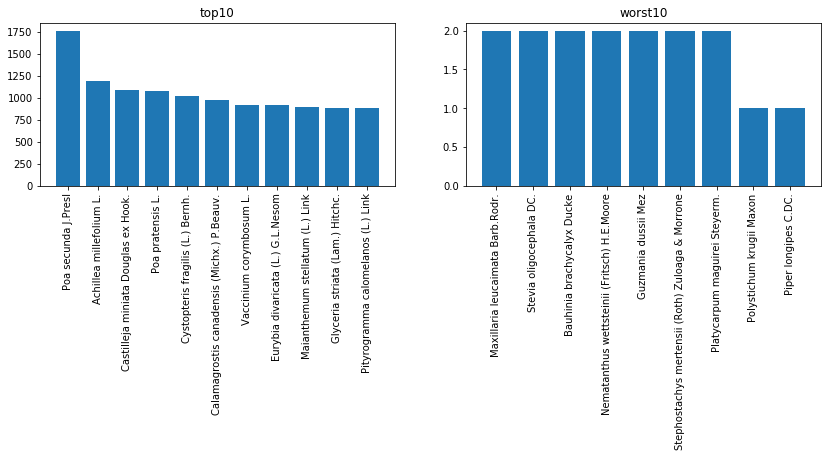

In [17]:
_train = train_df['category_name'].value_counts()
print(len(_train),'種類')
fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(_train[0:11].index,_train[0:11].values)
plt.xticks(rotation=90)
plt.title('top10')
ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(_train[-10:-1].index,_train[-10:-1].values)
plt.xticks(rotation=90)
plt.title('worst10')
fig.savefig("category_top10_worst_10.png",bbox_inches="tight")
plt.show()

310 family


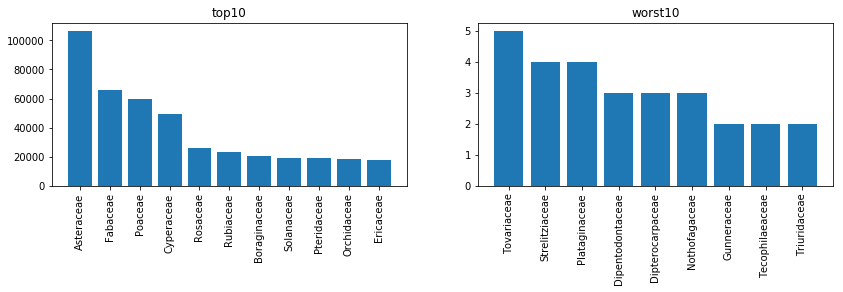

In [18]:
_train = train_df['family'].value_counts()
print(len(_train),'family')
fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(_train[0:11].index,_train[0:11].values)
plt.xticks(rotation=90)
plt.title('top10')
ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(_train[-10:-1].index,_train[-10:-1].values)
plt.xticks(rotation=90)
plt.title('worst10')
fig.savefig("family_top10_worst_10.png",bbox_inches="tight")
plt.show()

3678 genus


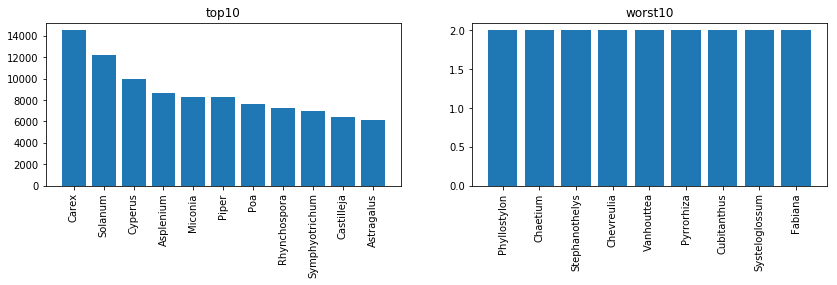

In [19]:
_train = train_df['genus'].value_counts()
print(len(_train),'genus')
fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(_train[0:11].index,_train[0:11].values)
plt.xticks(rotation=90)
plt.title('top10')
ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(_train[-10:-1].index,_train[-10:-1].values)
plt.xticks(rotation=90)
plt.title('worst10')
fig.savefig("genus_top10_worst_10.png",bbox_inches="tight")
plt.show()

In [20]:
print("Total Unique Values for each columns:")
print("{0:10s} \t {1:10d}".format('train_df', len(train_df)))
for col in train_df.columns:
    print("{0:10s} \t {1:10d}".format(col, len(train_df[col].unique())))

Total Unique Values for each columns:
train_df   	    1030747
category_id 	      32093
id         	    1030747
image_id   	    1030747
region_id  	          4
family     	        310
genus      	       3678
category_name 	      32093
file_name  	    1030747
height     	         32
license    	          1
width      	        181
region_name 	          4


Here, we can see that other than the `category_id`, there's also the `family`, `genus`, `category_name`, `region_id` and `region_name` for the other probable targets. `category_id` and `category_name` are one and the same, similar to `region_id` and `region_name`.

A possible approach for this kernel is to use a `CNN` to predict `family` and `genus` (we will ignore `region` for now). Then, using the `family` and `genus`, we will predict the `category_id` for the image.

In [21]:
family = train_df[['family', 'genus', 'category_name']].groupby(['family', 'genus']).count()
display(family.describe())

,category_name
count,3680.000000
mean,280.094293
std,763.666084
min,2.000000
25%,12.000000
50%,54.000000
75%,198.000000
max,14490.000000


With some proper `image_data_augmentation` we can make up for the small number of samples for some images (first quartile).

# Model Creation
一度にcategoryを当てに行くこともできるが、事前情報として与えられているfamilyやgenusの情報を生かして、モデルを構築するアプローチをとる。(そのまま予測する手法はほかメンバーが実施。)

familyやgenusをcategoryの予測に生かす時、familyやgenusを予測する分類器を作って、特定の層の重みを学習させないことができる。tensorFlowであれば、レイヤーにtrainable属性が存在し、パラメータを学習させたくない層やモデルについて、trainable属性をFalseとすることで、学習をかけないでおくことができる。(ただし学習前の最後にcompile()を実行しないと属性の変更が繁栄されないので注意)

参考のURLでは
> summary()の出力結果には反映されているが、実際に設定を有効にするにはcompile()する必要があるので注意。compile()のあとでtrainableを変更した場合、再度compile()しなければならない。

としているため、このnotebookではtrainable属性の変更をしていないまま学習をかけていることになっているのではないか？


参考
https://note.nkmk.me/python-tensorflow-keras-trainable-freeze-unfreeze/


## CNNの構造の決め方について
調べてもこういう時はこうするみたいな各事例ごとの具体例が出てくるのみ。また最近は「これが流行り」のようなモデル構造の隆盛まであるっぽい。結局どうすりゃいいかわからないから、Efficientnetに任せてしまうことにした。(AutoMLの考え方から)


参考
https://qiita.com/icoxfog417/items/5fd55fad152231d706c2

# Data Generator
data generatorを作る。
前処理等しておくにはデータの容量が大きすぎる。バッチごとに処理をするので、dataGeneratorに任せることとする。

処理時間参考
https://hironsan.hatenablog.com/entry/2017/09/09/130608

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(featurewise_center=False,
                                     featurewise_std_normalization=False,
                                     rotation_range=180,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2)

Now, we will transform the `family` and `genus` to ids.

In [23]:
m = train_df[['file_name', 'family', 'genus', 'category_id']]
fam = m.family.unique().tolist()
m.family = m.family.map(lambda x: fam.index(x))
gen = m.genus.unique().tolist()
m.genus = m.genus.map(lambda x: gen.index(x))
display(m)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,file_name,family,genus,category_id
0,images/156/72/354106.jpg,0,0,15672
1,images/156/72/545181.jpg,0,0,15672
2,images/156/72/449419.jpg,0,0,15672
3,images/156/72/200223.jpg,0,0,15672
4,images/156/72/5327.jpg,0,0,15672
...,...,...,...,...
1030742,images/027/65/602937.jpg,25,1554,2765
1030743,images/034/67/12768.jpg,32,798,3467
1030744,images/034/67/945011.jpg,32,798,3467
1030745,images/206/84/916700.jpg,309,3677,20684


# Train

In [24]:
os.chdir('../input')

In [25]:
from efficientnet.efficientnet.keras import EfficientNetB3 
#from efficientnet.efficientnet.model import EfficientNetB3
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, Input, concatenate
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split as tts

Using TensorFlow backend.


In [26]:
def fg_model(shape,lr):
    
    
    actual_shape = shape
    i = Input(actual_shape)
    x = EfficientNetB3(weights='imagenet', include_top=False, input_shape=actual_shape, pooling='max')(i)
    #x = Flatten()(x)
    o1 = Dense(310, name="family", activation='softmax')(x)
    o2 = concatenate([x,o1])
    o2 = Dense(3678, name="genus", activation='softmax')(o2)
    o3 = concatenate([x,o2])
    o3 = Dense(32093, name="category_id", activation='softmax')(o3)
    model = Model(inputs=i,outputs=[o1,o2,o3])
    
    #model.layers[1].trainable = False
    #model.get_layer('genus').trainable = False
    
    opt = Adam(lr=lr, amsgrad=True)
    model.compile(optimizer=opt, loss=['sparse_categorical_crossentropy', 
                                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy'],
                 metrics=['accuracy'])

    
    return model

In [27]:
model = fg_model((300,300,3), 0.01) #Efficientnet B3 was designed for image size 300x300
model.summary()

44113920/44107200 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
efficientnet-b3 (Model)         (None, 1536)         10783528    input_1[0][0]                    
__________________________________________________________________________________________________
family (Dense)                  (None, 310)          476470      efficientnet-b3[1][0]            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 1846)         0           efficientnet-b3[1][0]            
                           

# Train

Now, we will begin the training.

In [28]:

train, verif = tts(m, test_size=0.2, shuffle=True, random_state=17)
train = train[:40000]
verif = verif[:10000]
shape = (120, 120, 3)
epochs = 1
batch_size = 32

model = fg_model(shape, 0.007)
opt = Adam(lr=0.007, amsgrad=True)
#Disable the last two output layers for training the Family
model.get_layer('genus').trainable = True
model.get_layer('family').trainable = True
model.get_layer('category_id').trainable = True

model.compile(optimizer=opt, loss=['sparse_categorical_crossentropy', 
                               'sparse_categorical_crossentropy','sparse_categorical_crossentropy'],
             metrics=['accuracy'])
#Train Family for 2 epochs
model.fit_generator(train_datagen.flow_from_dataframe(dataframe=train,
                                                      directory='../input/herbarium-2020-fgvc7/nybg2020/train/',
                                                      x_col="file_name",
                                                      y_col=["family", "genus", "category_id"],
                                                      target_size=(120, 120),
                                                      batch_size=batch_size,
                                                      class_mode='multi_output'),
                    validation_data=train_datagen.flow_from_dataframe(
                        dataframe=verif,
                        directory='../input/herbarium-2020-fgvc7/nybg2020/train/',
                        x_col="file_name",
                        y_col=["family", "genus", "category_id"],
                        target_size=(120, 120),
                        batch_size=batch_size,
                        class_mode='multi_output'),
                    epochs=epochs,
                    steps_per_epoch=len(train)//batch_size,
                    validation_steps=len(verif)//batch_size,
                    verbose=1,
                    workers=8,
                    use_multiprocessing=True)

#Reshuffle the inputs
train, verif = tts(m, test_size=0.2, shuffle=True, random_state=18)
train = train[:40000]
verif = verif[:10000]

#Make the Genus layer Trainable
model.get_layer('genus').trainable = True
model.get_layer('family').trainable = False
model.get_layer('category_id').trainable = True
model.compile(optimizer=opt, loss=['sparse_categorical_crossentropy', 
                               'sparse_categorical_crossentropy','sparse_categorical_crossentropy'],
             metrics=['accuracy'])

#Train Family and Genus for 2 epochs
model.fit_generator(train_datagen.flow_from_dataframe(dataframe=train,
                                                      directory='../input/herbarium-2020-fgvc7/nybg2020/train/',
                                                      x_col="file_name",
                                                      y_col=["family", "genus", "category_id"],
                                                      target_size=(120, 120),
                                                      batch_size=batch_size,
                                                      class_mode='multi_output'),
                    validation_data=train_datagen.flow_from_dataframe(
                        dataframe=verif,
                        directory='../input/herbarium-2020-fgvc7/nybg2020/train/',
                        x_col="file_name",
                        y_col=["family", "genus", "category_id"],
                        target_size=(120, 120),
                        batch_size=batch_size,
                        class_mode='multi_output'),
                    epochs=epochs,
                    steps_per_epoch=len(train)//batch_size,
                    validation_steps=len(verif)//batch_size,
                    verbose=1,
                    workers=8,
                    use_multiprocessing=True)

#Reshuffle the inputs
train, verif = tts(m, test_size=0.2, shuffle=True, random_state=19)
train = train[:40000]
verif = verif[:10000]

#Make the category_id layer Trainable
model.get_layer('genus').trainable = True
model.get_layer('family').trainable = True
model.get_layer('category_id').trainable = True
model.compile(optimizer=opt, loss=['sparse_categorical_crossentropy', 
                               'sparse_categorical_crossentropy','sparse_categorical_crossentropy'],
             metrics=['accuracy'])
#Train them all for 2 epochs
model.fit_generator(train_datagen.flow_from_dataframe(dataframe=train,
                                                      directory='../input/herbarium-2020-fgvc7/nybg2020/train/',
                                                      x_col="file_name",
                                                      y_col=["family", "genus", "category_id"],
                                                      target_size=(120, 120),
                                                      batch_size=batch_size,
                                                      class_mode='multi_output'),
                    validation_data=train_datagen.flow_from_dataframe(
                        dataframe=verif,
                        directory='../input/herbarium-2020-fgvc7/nybg2020/train/',
                        x_col="file_name",
                        y_col=["family", "genus", "category_id"],
                        target_size=(120, 120),
                        batch_size=batch_size,
                        class_mode='multi_output'),
                    epochs=epochs,
                    steps_per_epoch=len(train)//batch_size,
                    validation_steps=len(verif)//batch_size,
                    verbose=1,
                    workers=8,
                    use_multiprocessing=True)

Found 40000 validated image filenames.
Found 10000 validated image filenames.
Epoch 1/1
1250/1250 [==============================] - 884s 707ms/step - loss: 20.9102 - family_loss: 4.3009 - genus_loss: 6.8415 - category_id_loss: 9.7678 - family_accuracy: 0.1192 - genus_accuracy: 0.0206 - category_id_accuracy: 0.0015 - val_loss: 22.6747 - val_family_loss: 4.6613 - val_genus_loss: 7.6292 - val_category_id_loss: 11.0252 - val_family_accuracy: 0.1163 - val_genus_accuracy: 0.0196 - val_category_id_accuracy: 0.0013
Found 40000 validated image filenames.
Found 10000 validated image filenames.
Epoch 1/1
1250/1250 [==============================] - 892s 713ms/step - loss: 22.4586 - family_loss: 4.6845 - genus_loss: 7.2862 - category_id_loss: 10.4880 - family_accuracy: 0.1044 - genus_accuracy: 0.0185 - category_id_accuracy: 0.0010 - val_loss: 19.9688 - val_family_loss: 4.2954 - val_genus_loss: 6.9419 - val_category_id_loss: 10.0653 - val_family_accuracy: 0.1139 - val_genus_accuracy: 0.0217 - val_

In [29]:
model.save('../working/fg_model.h5')

# Predict

Now, we will do our prediction. We may as well skip doing a confusion-matrix for our model because it's not even fully trained, so we go straight to our submission.

Similar to the above reason, we will be limiting the `predictions` to the first `10,000` items due to RAM limitations.

In [30]:
del train, verif, m, train_df, fam, gen, _train
batch_size = 32

# generator = test_datagen.flow_from_dataframe(
#         dataframe = test_df,#.iloc[:10000], 
#         directory = '../input/herbarium-2020-fgvc7/nybg2020/test/',
#         x_col = 'file_name',
#         target_size=(120, 120),
#         batch_size=batch_size,
#         class_mode=None,  # only data, no labels
#         shuffle=False)

# family, genus, category = model.predict_generator(generator, verbose=1)

In [31]:

categories = []
for i in range(1,len(test_df)):
    if i % 10000 == 0:
        test_datagen = ImageDataGenerator(featurewise_center=False,
                                  featurewise_std_normalization=False)
        generator = test_datagen.flow_from_dataframe(
            dataframe = test_df.iloc[i-10000:i], 
            directory = '../input/herbarium-2020-fgvc7/nybg2020/test/',
            x_col = 'file_name',
            target_size=(120, 120),
            batch_size=batch_size,
            class_mode=None,  # only data, no labels
            shuffle=False)

        family, genus, category = model.predict_generator(generator, verbose=1,max_queue_size=10)
        categories.append(np.argmax(category, axis=1))
        last = i # 最後のindexを保存
        del test_datagen, generator, family,genus
    elif i == (len(test_df)-1):
        test_datagen = ImageDataGenerator(featurewise_center=False,
                                  featurewise_std_normalization=False)        
        generator = test_datagen.flow_from_dataframe(
            dataframe = test_df.iloc[last:i+1], 
            directory = '../input/herbarium-2020-fgvc7/nybg2020/test/',
            x_col = 'file_name',
            target_size=(120, 120),
            batch_size=batch_size,
            class_mode=None,  # only data, no labels
            shuffle=False)

        family, genus, category = model.predict_generator(generator, verbose=1,max_queue_size=10)
        categories.append(np.argmax(category, axis=1))
        del test_datagen, generator,family,genus
#categories = np.concatenate(categories,axis=0)

Found 10000 validated image filenames.
313/313 [==============================] - 144s 461ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 137s 438ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 135s 430ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 135s 431ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 136s 434ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 136s 433ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 133s 426ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 139s 443ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 139s 445ms/step
Found 10000 validated image filenames.
313/313 [==============================] - 139s 443ms/step
Found 10000 validate

# Submission

Next, we'll save the predicted values under `predictions` into the specified format for submissions. Remember that our `predictions` is a `list` of 3-outputs, namely: `family`, `genus`, `category_id` in that order.

In [32]:
np.concatenate(categories[0:2])

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
sub = pd.DataFrame()
sub['Id'] = test_df.image_id
sub['Id'] = sub['Id'].astype('int32')
sub['Predicted'] = np.concatenate(categories)
sub['Predicted'] = sub['Predicted'].astype('int32')
display(sub)
sub.to_csv('../working/submission.csv', index=False)

,Id,Predicted
0,104891,0
1,18029,0
2,35151,0
3,124144,0
4,24649,0
...,...,...
138287,32738,0
138288,16804,0
138289,113662,0
138290,86100,0


# Finish

There you have it! A working model for predicting the `Category` of the plants. I hope that this kernel helped you on your journey in unraveling the mysteries of this dataset! Please upvote before forking___________3-(^_^ )

In [34]:
# end_time = time.time()
# total = end_time - start_time
# h = total//3600
# m = (total%3600)//60
# s = total%60
# print("Total time spent: %i hours, %i minutes, and %i seconds" %(h, m, s))

In [35]:
# in_out_size = (120*120) + 3 #We will resize the image to 120*120 and we have 3 outputs
# def xavier(shape, dtype=None):
#     return np.random.rand(*shape)*np.sqrt(1/in_out_size)

# def fg_model(shape, lr=0.001):
#     '''Family-Genus model receives an image and outputs two integers indicating both the family and genus index.'''
#     i = Input(shape)
    
#     x = Conv2D(3, (3, 3), activation='relu', padding='same', kernel_initializer=xavier)(i)
#     x = Conv2D(3, (5, 5), activation='relu', padding='same', kernel_initializer=xavier)(x)
#     x = MaxPool2D(pool_size=(3, 3), strides=(3,3))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
#     x = Conv2D(16, (5, 5), activation='relu', padding='same', kernel_initializer=xavier)(x)
#     #x = Conv2D(16, (5, 5), activation='relu', padding='same', kernel_initializer=xavier)(x)
#     x = MaxPool2D(pool_size=(5, 5), strides=(5,5))(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
#     x = Flatten()(x)
    
#     o1 = Dense(310, activation='softmax', name='family', kernel_initializer=xavier)(x)
    
#     o2 = concatenate([o1, x])
#     o2 = Dense(3678, activation='softmax', name='genus', kernel_initializer=xavier)(o2)
    
#     o3 = concatenate([o1, o2, x])
#     o3 = Dense(32094, activation='softmax', name='category_id', kernel_initializer=xavier)(o3)
    
#     x = Model(inputs=i, outputs=[o1, o2, o3])
    
#     opt = Adam(lr=lr, amsgrad=True)
#     x.compile(optimizer=opt, loss=['sparse_categorical_crossentropy', 
#                                    'sparse_categorical_crossentropy', 
#                                    'sparse_categorical_crossentropy'],
#                  metrics=['accuracy'])
#     return x

# model = fg_model((120, 120, 3))
# model.summary()
# plot_model(model, to_file='full_model_plot.png', show_shapes=True, show_layer_names=True)